In [1]:
import pandas as pd
df = pd.read_csv('deepsea.csv')
df.head()


,tweet,category
0,Fascinating discovery! An abyssal fish species...,biology
1,Deep sea fish really said 'surface world I'm c...,meme
2,Research suggests rapid vertical migration mig...,biology
3,lmao this fish literally speedran evolving to ...,meme
4,The vertical migration observed in this abyssa...,biology


In [12]:
import re
import nltk
import numpy as np
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jorgejimenez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
mapper = {
    1: 'Suicide',
    0: 'Non-suicide'
}
df['etiqueta'] = df['category'].map(mapper)
df.head()

,tweet,category,etiqueta,clean_tweet
0,Fascinating discovery! An abyssal fish species...,biology,NaN,fascinating discovery abyssal fish specie obse...
1,Deep sea fish really said 'surface world I'm c...,meme,NaN,deep sea fish really said surface world coming...
2,Research suggests rapid vertical migration mig...,biology,NaN,research suggests rapid vertical migration mig...
3,lmao this fish literally speedran evolving to ...,meme,NaN,lmao fish literally speedran evolving surface ...
4,The vertical migration observed in this abyssa...,biology,NaN,vertical migration observed abyssal specie pro...


In [14]:
import contractions
from tqdm import tqdm
tqdm.pandas()

def preprocesamiento_texto(texto):
    texto = texto.lower()
    texto = contractions.fix(texto)
    texto = re.sub(r'[^a-z\s]','', texto)
    texto_tokenized = word_tokenize(texto)
    texto_no_stop = [token for token in texto_tokenized if token not in stopwords_en]
    final = [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final = ' '.join(final)
    return final

In [15]:


df['clean_tweet'] = df['tweet'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 462/462 [00:00<00:00, 6745.41it/s]


,tweet,category,etiqueta,clean_tweet
0,Fascinating discovery! An abyssal fish species...,biology,NaN,fascinating discovery abyssal fish specie obse...
1,Deep sea fish really said 'surface world I'm c...,meme,NaN,deep sea fish really said surface world coming...
2,Research suggests rapid vertical migration mig...,biology,NaN,research suggests rapid vertical migration mig...
3,lmao this fish literally speedran evolving to ...,meme,NaN,lmao fish literally speedran evolving surface ...
4,The vertical migration observed in this abyssa...,biology,NaN,vertical migration observed abyssal specie pro...


In [16]:
x = df['clean_tweet']
y = df['category']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=101)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:

tfidf_vectorizer = TfidfVectorizer()
x_train_vectorized = tfidf_vectorizer.fit_transform(x_train)
x_test_vectorized = tfidf_vectorizer.transform(x_test)

In [10]:
from sklearn.svm import  SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

              precision    recall  f1-score   support

     biology       1.00      1.00      1.00        71
        meme       1.00      1.00      1.00        68

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



<Axes: >

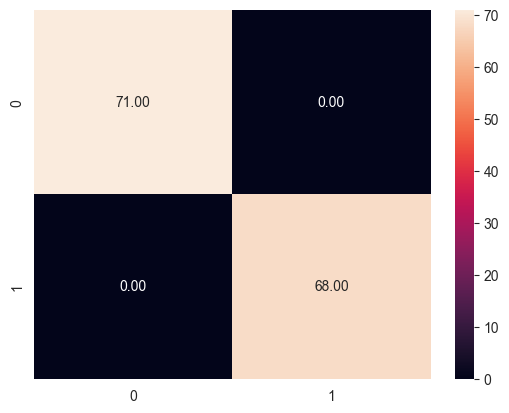

In [11]:
model_1 = SVC()
model_1.fit(x_train_vectorized, y_train)
y_pred = model_1.predict(x_test_vectorized)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

     biology       1.00      1.00      1.00        71
        meme       1.00      1.00      1.00        68

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



<Axes: >

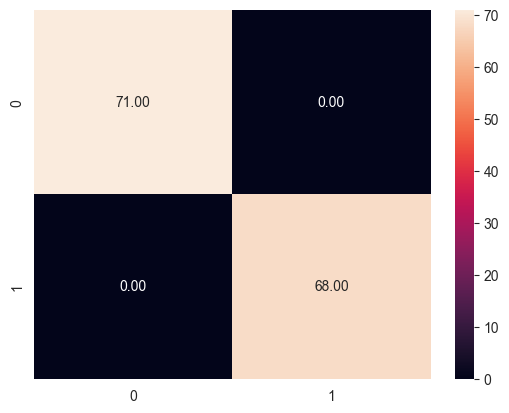

In [19]:
model_2 = SVC(kernel='linear')
model_2.fit(x_train_vectorized, y_train)
y_pred = model_2.predict(x_test_vectorized)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

## Hello
